In [0]:
# This is the code for training the models on preprocessed imdb dataset
# To test the code, run the last 4 cells after loading the model files in the colab environment ie. the cells starting right after the references cell
# It will give graphs, accuracy and confusion matrix for the 3 models
# To train models again, run all cells from the top

In [0]:
#import files
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import re
import nltk
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten,Conv1D,LSTM,SimpleRNN, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model

In [35]:
#download all nltk files
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [36]:
#install self attention library
!pip install keras-self-attention
from keras_self_attention import SeqSelfAttention

In [0]:
from keras.datasets import imdb

In [0]:
#loading the imdb dataset
vocabulary_size=10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)

In [0]:
#padding imdb dataset
from keras.preprocessing import sequence
maxlen = 100
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [0]:
#build cnn model
def build_CNN(vocabulary_size,maxlen):
  model = Sequential()
  model.add(Embedding(vocabulary_size, 100, input_length=maxlen))
  model.add(Conv1D(128, 5, activation='relu'))  
  model.add(Conv1D(64, 5, activation='relu'))
  model.add(Conv1D(32, 5, activation='relu'))
  model.add(SeqSelfAttention(attention_activation='sigmoid'))
  model.add(Flatten()) 
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model

In [41]:
CNNmodel= build_CNN(vocabulary_size,maxlen)
CNNmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 92, 64)            41024     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 88, 32)            10272     
_________________________________________________________________
seq_self_attention_2 (SeqSel (None, 88, 32)            2113      
_________________________________________________________________
flatten_2 (Flatten)          (None, 2816)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [42]:
#train cnn model
history = CNNmodel.fit(X_train, y_train, batch_size=85, epochs=3, verbose=1, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 90s 4ms/step - loss: 0.4488 - acc: 0.7767 - val_loss: 0.3633 - val_acc: 0.8376
Epoch 2/3
20000/20000 [==============================] - 87s 4ms/step - loss: 0.2532 - acc: 0.8968 - val_loss: 0.3798 - val_acc: 0.8376
Epoch 3/3
20000/20000 [==============================] - 87s 4ms/step - loss: 0.1641 - acc: 0.9359 - val_loss: 0.4593 - val_acc: 0.8280


In [43]:
#test cnn model
score = CNNmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

25000/25000 [==============================] - 34s 1ms/step
Test Score: 0.4755572949504852
Test Accuracy: 0.82308


In [44]:
#confusion matrix for cnn model
y_pred = CNNmodel.predict(X_test)
y_pred=np.rint(y_pred)
confusion_matrix(y_pred,y_test)

array([[10185,  2108],
       [ 2315, 10392]])

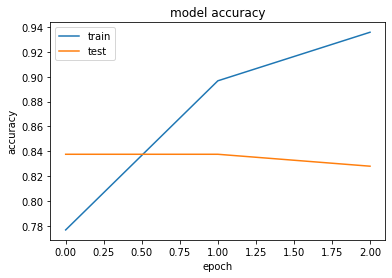

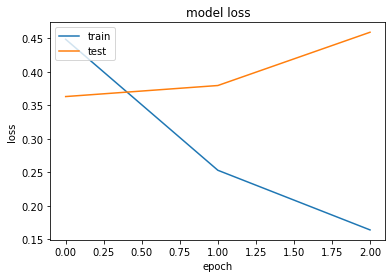

In [45]:
#plot accuracy and loss graphs
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:
#create LSTM model
def build_LSTM(vocabulary_size,maxlen):
  model = Sequential()
  model.add(Embedding(vocabulary_size, 128, input_length=maxlen))
  model.add(Bidirectional(LSTM(64,return_sequences=True)))
  model.add(Bidirectional(LSTM(32)))
  #model.add(SeqSelfAttention(attention_activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model

In [47]:
LSTMmodel= build_LSTM(vocabulary_size,maxlen)
LSTMmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_5 (Bidirection (None, 100, 128)          98816     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 64)                41216     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 1,420,097
Trainable params: 1,420,097
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = LSTMmodel.fit(X_train, y_train, batch_size=85, epochs=3, verbose=1, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 134s 7ms/step - loss: 0.4462 - acc: 0.7777 - val_loss: 0.3524 - val_acc: 0.8464
Epoch 2/3
20000/20000 [==============================] - 127s 6ms/step - loss: 0.2564 - acc: 0.8978 - val_loss: 0.4052 - val_acc: 0.8220
Epoch 3/3
20000/20000 [==============================] - 126s 6ms/step - loss: 0.1777 - acc: 0.9349 - val_loss: 0.3852 - val_acc: 0.8396


In [49]:
score = LSTMmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

25000/25000 [==============================] - 43s 2ms/step
Test Score: 0.3918356348800659
Test Accuracy: 0.83624


In [50]:
y_pred = LSTMmodel.predict(X_test)
y_pred=np.rint(y_pred)
confusion_matrix(y_pred,y_test)

array([[10628,  2222],
       [ 1872, 10278]])

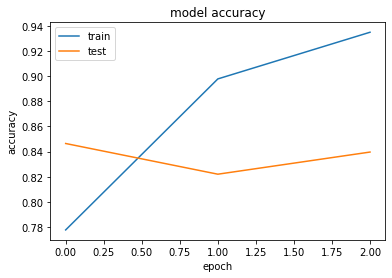

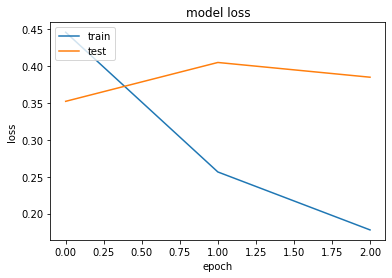

In [51]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:
def build_RNN(vocabulary_size,maxlen):
  model = Sequential()
  embedding_layer = Embedding(vocabulary_size, 100, input_length=maxlen )
  model.add(embedding_layer)
  model.add(Bidirectional(SimpleRNN(128, activation='relu',return_sequences=True)))
  model.add(Bidirectional(SimpleRNN(32, activation='relu')))
  #model.add(SeqSelfAttention(attention_activation='sigmoid'))
  model.add(Dense(16,activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
  return model

In [53]:
RNNmodel= build_RNN(vocabulary_size,maxlen)
RNNmodel.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_7 (Bidirection (None, 100, 256)          58624     
_________________________________________________________________
bidirectional_8 (Bidirection (None, 64)                18496     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,078,177
Trainable params: 1,078,177
Non-trainable params: 0
_________________________________________________________________


In [54]:
history = RNNmodel.fit(X_train, y_train, batch_size=85, epochs=4, verbose=1, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 60s 3ms/step - loss: 0.5686 - acc: 0.6823 - val_loss: 0.8694 - val_acc: 0.7702
Epoch 2/4
20000/20000 [==============================] - 56s 3ms/step - loss: 0.3893 - acc: 0.8231 - val_loss: 0.4844 - val_acc: 0.7580
Epoch 3/4
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2548 - acc: 0.8954 - val_loss: 0.4086 - val_acc: 0.8222
Epoch 4/4
20000/20000 [==============================] - 56s 3ms/step - loss: 0.1742 - acc: 0.9333 - val_loss: 0.4431 - val_acc: 0.8130


In [55]:
score = RNNmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

25000/25000 [==============================] - 26s 1ms/step
Test Score: 0.4526890682935715
Test Accuracy: 0.81484


In [56]:
y_pred = RNNmodel.predict(X_test)
y_pred=np.rint(y_pred)
confusion_matrix(y_pred,y_test)

array([[10867,  2996],
       [ 1633,  9504]])

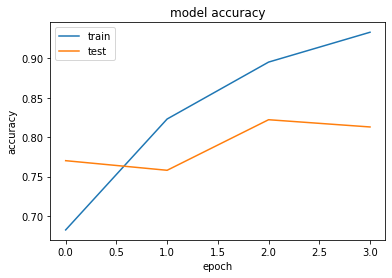

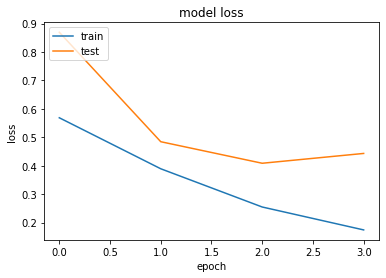

In [57]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [0]:
#saving model files
RNNmodel.save('rnn_preprocessed.h5')
CNNmodel.save('cnn_preprocessed.h5')
LSTMmodel.save('lstm_preprocessed.h5')

In [0]:
# References:
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://keras.io/examples/imdb_bidirectional_lstm/
# https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/AXwJI/implementing-lstms-in-code
# https://www.coursera.org/learn/natural-language-processing-tensorflow/lecture/Sydkf/notebook-for-lesson-2
# https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/
# https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90
# https://towardsdatascience.com/a-beginners-guide-on-sentiment-analysis-with-rnn-9e100627c02e
# https://medium.com/@Petuum/embeddings-a-matrix-of-meaning-4de877c9aa27
# https://github.com/tensorflow/tensorflow/issues/23698
# https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
# https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%201.ipynb
# https://jovianlin.io/saving-loading-keras-models/

In [60]:
#testing part
#please load saved model files before testing
import pandas as pd
import numpy as np
from numpy import array
from numpy import asarray
from numpy import zeros
import re
import nltk
from numpy import array
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten,Conv1D,LSTM,SimpleRNN, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import nltk
nltk.download('all')
!pip install keras-self-attention
from keras_self_attention import SeqSelfAttention

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

25000/25000 [==============================] - 33s 1ms/step
Test Score: 0.4755572949504852
Test Accuracy: 0.82308
[[10185  2108]
 [ 2315 10392]]


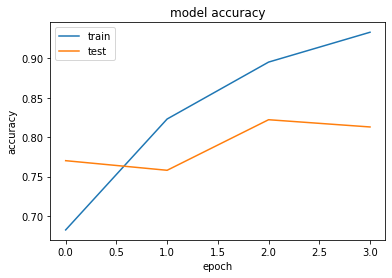

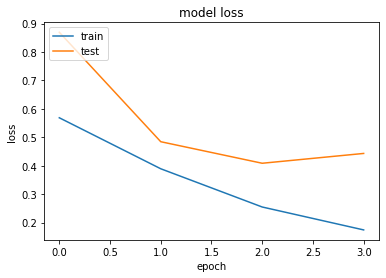

In [61]:
CNNmodel = load_model('cnn_preprocessed.h5', custom_objects = {'SeqSelfAttention':SeqSelfAttention})
score = CNNmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
y_pred = CNNmodel.predict(X_test)
y_pred=np.rint(y_pred)
print(confusion_matrix(y_pred,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

25000/25000 [==============================] - 45s 2ms/step
Test Score: 0.3918356348800659
Test Accuracy: 0.83624
[[10628  2222]
 [ 1872 10278]]


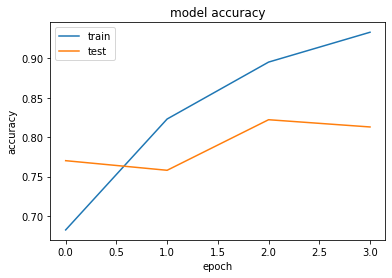

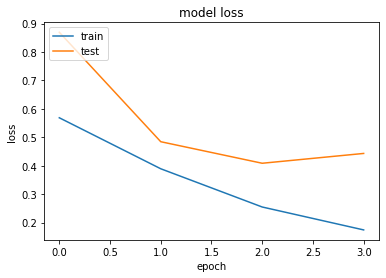

In [62]:
LSTMmodel = load_model('lstm_preprocessed.h5', custom_objects = {'SeqSelfAttention':SeqSelfAttention})
score = LSTMmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
y_pred = LSTMmodel.predict(X_test)
y_pred=np.rint(y_pred)
print(confusion_matrix(y_pred,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

25000/25000 [==============================] - 29s 1ms/step
Test Score: 0.4526890682935715
Test Accuracy: 0.81484
[[10867  2996]
 [ 1633  9504]]


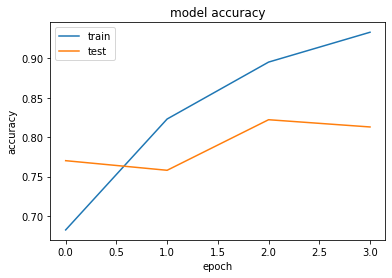

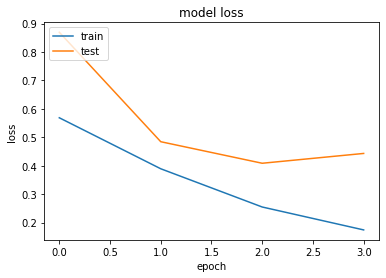

In [63]:
RNNmodel = load_model('rnn_preprocessed.h5', custom_objects = {'SeqSelfAttention':SeqSelfAttention})
score = RNNmodel.evaluate(X_test,y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])
y_pred = RNNmodel.predict(X_test)
y_pred=np.rint(y_pred)
print(confusion_matrix(y_pred,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()